# Slides
TBD

# Desmos demo
TBD

# Reference
#### THE HUNDRED-PAGE MACHINE LEARNING BOOK
#### Andrew Ng Logistic Regression https://www.youtube.com/playlist?list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy
#### Machine learning mastery https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/ 

# Credits
#### Slides, demo, code by Mohand Alrasheed and Abulrahman Alshawi

In [4]:
from math import prod as product
from math import e

from numpy import array, arange, log # log here is base e, and log10 is base 10
from numpy.random import rand
import matplotlib.pyplot as plt

## Hypothesis 
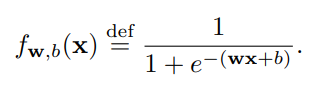

In [16]:
def h(x, w, b):
    """
    Hypothesis function
    x: Input variable
    w: Weight
    b: Bias
    """
    return 1/(1 + e ** -(w * x + b))

## Maximum Likelihood
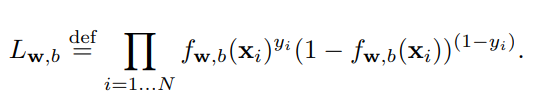

In [17]:
def maximum_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 1
    for x, y in zip(X, Y):
        if y: 
            output *= h(x, w, b)
        else:
            output *= 1 - h(x, w, b)
    return output

def maximum_likelihood_alternative(X, Y, h, w, b):
    return product(h(x, w, b) ** y * (1-h(x, w, b)) ** (1-y) for x, y in zip(X, Y))

## Log-Likelihood
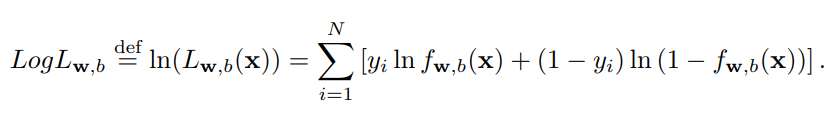

In [18]:
def log_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 0
    for x, y in zip(X, Y):
        if y: 
            output += log(h(x, w, b))
        else:
            output += log(1 - h(x, w, b))
    return output

def log_likelihood_alternative(X, Y, h, w, b):
    return sum(y * log(h(x, w, b)) + (1-y) * log(1-h(x, w, b)) for x, y in zip(X, Y))

## Gradient Descent
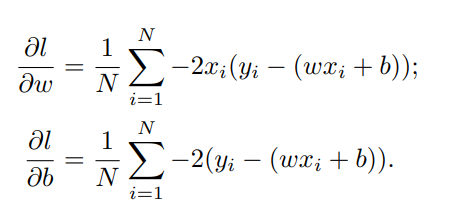
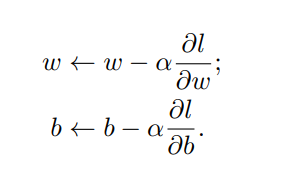

In [19]:
def gradient_descent(X, Y, h, w, b, num_iterations, alpha):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    num_iterations: The number of iterations
    alpha: Constant alpha
    """
    N = len(X)
    for _ in range(num_iterations):
        w_grad = b_grad = 0
        for x, y in zip(X, Y):
            temp = -2 * (y - h(x, w, b))
            w_grad +=  x * temp
            b_grad +=  temp

        w -= alpha * w_grad * 1/N
        b -= alpha * b_grad * 1/N
    return w, b

## Experiment
##### Generate m numbers starting from 0 + a bit of noise 
##### Labels are Y = X > m//2 
##### Predict Y based on X 

In [7]:
m = 50
noise = 1.5

X = array(range(m), dtype="float64")
Y = X > m//2

X += rand(m) * noise

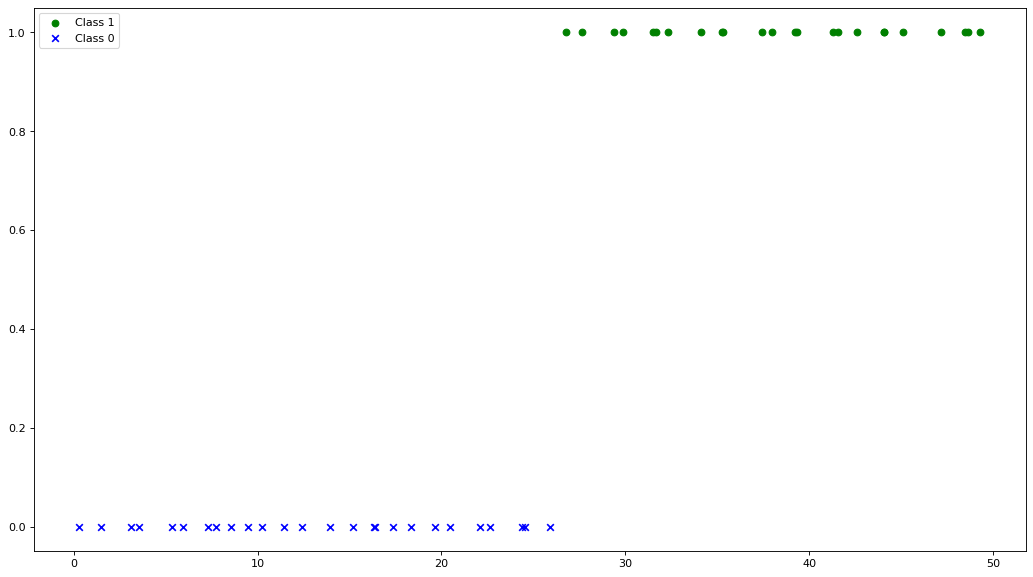

In [8]:
plt.style.use('seaborn-pastel') #sets the size of the charts
fig, ax = plt.subplots(1, figsize=(16, 9), dpi=80)

ax.scatter(X[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
ax.scatter(X[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

ax.legend()
plt.show()


In [11]:
w, b = gradient_descent(X, Y, h, 0., 0., 5000, 0.1)

In [12]:
w, b

(1.1961639250675438, -35.073272769729314)

In [13]:
h(100, w, b)

1.0

In [14]:
h(0, w, b)

5.859643222338259e-16

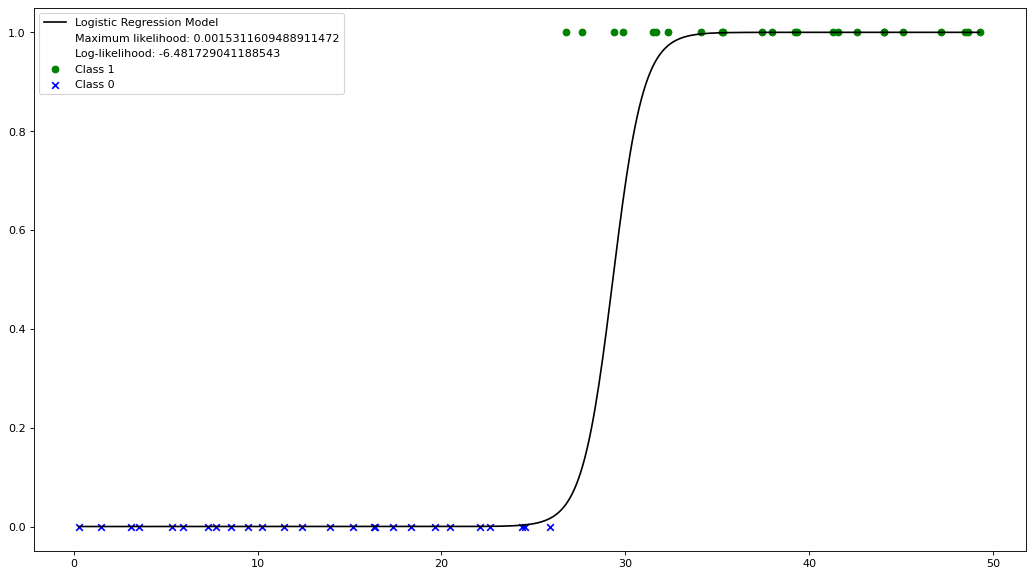

In [21]:
fig, ax = plt.subplots(1, figsize=(16, 9), dpi=80)
plt.style.use('seaborn-pastel')

# Model
indices = arange(min(X), max(X), 0.1)
ax.plot(indices, h(indices, w, b), label="Logistic Regression Model", color='black')

# Sample
ax.scatter(X[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
ax.scatter(X[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

# Misc
# ax.axhline(0.5, label=f"Threshold at 0.5", color='red')
plt.plot([], [], ' ', label=f"Maximum likelihood: {maximum_likelihood(X, Y, h, w, b)}")
plt.plot([], [], ' ', label=f"Log-likelihood: {log_likelihood(X, Y, h, w, b)}")


ax.legend()
plt.show()
